## **Kaggle Data**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/austinreese/craigslist-carstrucks-data/versions/10


## **Utils**

In [3]:
# Imports
import os
import re
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

## **Read CSV**

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
used_cars_df = pd.read_csv(os.path.join(path, 'vehicles.csv'))

used_cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
used_cars_df.isna().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [6]:
used_cars_df.shape

(426880, 26)

In [7]:
used_cars_df = used_cars_df.drop(columns=['url', 'region_url', 'image_url','id','county','VIN','description','lat','long'])

In [8]:
used_cars_df = used_cars_df.dropna(axis=0,how='all')

In [9]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
 16  posting_date  426812 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [10]:
# 1)Convert data to the correct data types: Inspect the dataset and convert all columns to the appropriate data type (e.g., numerical, categorical, date). Give a summary of your results and the procedures you followed to confirm that the data types were proper.



In [11]:
used_cars_df.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,2021-04-04T03:21:11-0600
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN,wy,2021-04-04T03:21:07-0600


In [12]:
used_cars_df['year'] = pd.to_datetime(used_cars_df['year'], format='%Y')
used_cars_df['year'] = used_cars_df['year'].dt.year

used_cars_df['posting_date'] = pd.to_datetime(used_cars_df['posting_date'],utc=True)


In [13]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   region        426880 non-null  object             
 1   price         426880 non-null  int64              
 2   year          425675 non-null  float64            
 3   manufacturer  409234 non-null  object             
 4   model         421603 non-null  object             
 5   condition     252776 non-null  object             
 6   cylinders     249202 non-null  object             
 7   fuel          423867 non-null  object             
 8   odometer      422480 non-null  float64            
 9   title_status  418638 non-null  object             
 10  transmission  424324 non-null  object             
 11  drive         296313 non-null  object             
 12  size          120519 non-null  object             
 13  type          334022 non-null  object       

In [14]:
import scipy.stats as stats

# 1. Get a list of columns with missing values
columns_with_missing_values = used_cars_df.columns[used_cars_df.isnull().any()].tolist()

# 2. Iterate through columns and perform hypothesis testing
for feature in columns_with_missing_values:
    # 3. Create two groups
    group_missing = used_cars_df[used_cars_df[feature].isnull()]['price']
    group_non_missing = used_cars_df[used_cars_df[feature].notnull()]['price']

    # 4. Perform the KS test
    ks_statistic, p_value = stats.ks_2samp(group_missing, group_non_missing)

    # 5. Interpret results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"Reject H0 for '{feature}': There is a significant difference in 'price' distribution for missing and non-missing values.")
        # Calculate and print effect size (e.g., difference in means)
        effect_size = group_non_missing.mean() - group_missing.mean()
        print(f"Effect size (difference in means): {effect_size}")
    else:
        print(f"Fail to reject H0 for '{feature}': No significant difference in 'price' distribution for missing and non-missing values.")

Reject H0 for 'year': There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): 37767.208716631896
Reject H0 for 'manufacturer': There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): 43476.02856335357
Reject H0 for 'model': There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): -1149097.2003209314
Reject H0 for 'condition': There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): -37731.23193701381
Reject H0 for 'cylinders': There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): -21670.370333726823
Reject H0 for 'fuel': There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (d

In [15]:
for feature in columns_with_missing_values:
       used_cars_df[feature + '_missing'] = used_cars_df[feature].isnull().astype(int)

# Get missing indicator columns
missing_indicator_cols = [col for col in used_cars_df.columns if col.endswith('_missing')]

import numpy as np

# Select only numeric columns before calculating correlations
numeric_df = used_cars_df.select_dtypes(include=np.number)

# Calculate correlations on the numeric DataFrame
price_correlations = numeric_df.corr()['price'][missing_indicator_cols]

 # Print the correlations
print("Correlations of 'price' with missingness indicators:")
print(price_correlations)

Correlations of 'price' with missingness indicators:
year_missing           -0.000164
manufacturer_missing   -0.000710
model_missing           0.010422
condition_missing       0.001522
cylinders_missing       0.000877
fuel_missing           -0.000398
odometer_missing       -0.000551
title_status_missing   -0.000696
transmission_missing   -0.000386
drive_missing           0.001456
size_missing           -0.000746
type_missing            0.005602
paint_color_missing     0.002704
posting_date_missing   -0.000067
Name: price, dtype: float64


In [17]:
columns_with_missing_values = used_cars_df.columns[used_cars_df.isnull().any()].tolist()

# 2. Iterate through columns and perform hypothesis testing
for feature in columns_with_missing_values:
    # 3. Create two groups
    group_missing = used_cars_df[used_cars_df[feature].isnull()]['price']
    group_non_missing = used_cars_df[used_cars_df[feature].notnull()]['price']

    # 4. Test for normality of 'price'
    _, p_value_normal = stats.normaltest(used_cars_df['price'])  # Test for normality

    # 5. Choose appropriate test based on normality
    if p_value_normal >= 0.05:  # Assume normality if p-value >= 0.05
        # a) Perform Independent Samples t-test
        t_statistic, p_value = stats.ttest_ind(group_missing, group_non_missing)
        test_name = "Independent Samples t-test"
    else:
        # b) Perform Mann-Whitney u-test
        u_statistic, p_value = stats.mannwhitneyu(group_missing, group_non_missing)
        test_name = "Mann-Whitney u-test"

    # 6. Interpret results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"Reject H0 for '{feature}' using {test_name}: There is a significant difference in 'price' distribution for missing and non-missing values.")
        # Calculate and print effect size (e.g., difference in means or medians)
        effect_size = group_non_missing.mean() - group_missing.mean()  # Use mean for t-test, consider median for Mann-Whitney
        print(f"Effect size (difference in means): {effect_size}")
    else:
        print(f"Fail to reject H0 for '{feature}' using {test_name}: No significant difference in 'price' distribution for missing and non-missing values.")

Reject H0 for 'year' using Mann-Whitney u-test: There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): 37767.208716631896
Reject H0 for 'manufacturer' using Mann-Whitney u-test: There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): 43476.02856335357
Reject H0 for 'model' using Mann-Whitney u-test: There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): -1149097.2003209314
Reject H0 for 'condition' using Mann-Whitney u-test: There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): -37731.23193701381
Reject H0 for 'cylinders' using Mann-Whitney u-test: There is a significant difference in 'price' distribution for missing and non-missing values.
Effect size (difference in means): -21670.370333726823


In [21]:
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer



def impute_missing_values(df):
    """
    Imputes missing values based on the provided strategy.

    Args:
        df (pd.DataFrame): The DataFrame containing missing values.

    Returns:
        pd.DataFrame: The DataFrame with imputed values.
    """

    # Get missing percentage for each column
    missing_percentage = df.isnull().sum() / len(df) * 100

    # Iterate through columns with missing values
    for col in df.columns[df.isnull().any()].tolist():
        # a) Mean Imputation for numerical data with missingness < 20%
        if missing_percentage[col] < 20 and pd.api.types.is_numeric_dtype(df[col]):
            imputer = SimpleImputer(strategy='mean')
            df[col] = imputer.fit_transform(df[[col]])

        # b) KNN or Iterative Imputer for missingness between 20% and 40%
        elif 20 <= missing_percentage[col] < 40 and pd.api.types.is_numeric_dtype(df[col]):
            # Choose KNN or IterativeImputer based on your preference
            imputer = KNNImputer()  # Or: imputer = IterativeImputer()
            df[col] = imputer.fit_transform(df[[col]])

        # c) Mode Imputation or "Unknown" category for categorical data
        elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
            # Choose Mode Imputation or "Unknown" category based on your preference
            # Mode Imputation:
            imputer = SimpleImputer(strategy='most_frequent')
            df[col] = imputer.fit_transform(df[[col]]).ravel()
            # Or: "Unknown" category:
            # df[col] = df[col].fillna('Unknown')

        # d) Remove feature if missingness > 40% and no strong influence on 'price'
        elif missing_percentage[col] >= 40:
            # Assuming you've already done the hypothesis testing and correlation analysis
            # and determined that the feature has no strong influence on 'price'
            df = df.drop(columns=[col])

    return df

# Apply the imputation strategy
used_cars_df_imputed = impute_missing_values(used_cars_df.copy())  # Create a copy to avoid modifying the original DataFrame

<ipython-input-21-ebb3f9bf3265>:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
<ipython-input-21-ebb3f9bf3265>:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
<ipython-input-21-ebb3f9bf3265>:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
<ipython-input-21-ebb3f9bf3265>:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

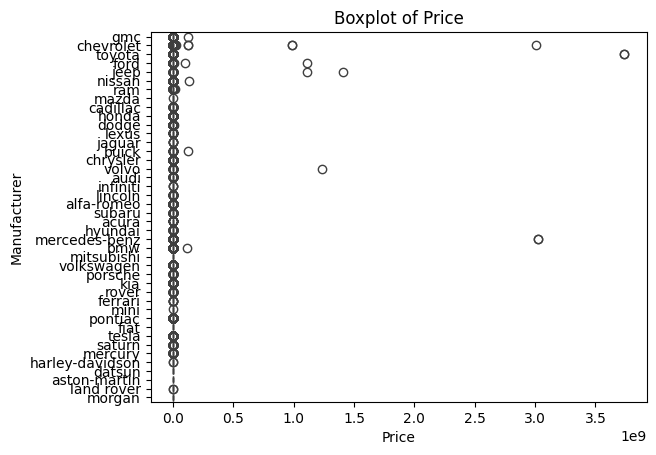

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = used_cars_df,x='price',y='manufacturer')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.title('Boxplot of Price')
plt.show()

In [ ]:

# 2a) Capping or Trimming Method

# For 'price' variable:
price_upper_limit = used_cars_df['price'].quantile(0.95)  # 95th percentile
price_lower_limit = used_cars_df['price'].quantile(0.05)  # 5th percentile
used_cars_df['price_capped'] = np.clip(used_cars_df['price'], price_lower_limit, price_upper_limit)

# For other relevant features:
# Replace 'mileage' with other features as needed
mileage_upper_limit = used_cars_df['mileage'].quantile(0.95)
mileage_lower_limit = used_cars_df['mileage'].quantile(0.05)


In [ ]:

# 2a) Capping or Trimming Method

# For 'price' variable:
price_upper_limit = used_cars_df['price'].quantile(0.95)  # 95th percentile
price_lower_limit = used_cars_df['price'].quantile(0.05)  # 5th percentile
used_cars_df['price_capped'] = np.clip(used_cars_df['price'], price_lower_limit, price_upper_limit)

# For other relevant features:
# Replace 'mileage' with other features as needed
mileage_upper_limit = used_cars_df['mileage'].quantile(0.95)
mileage_lower_limit = used_cars_df['mileage'].quantile(0.05)
used_cars_df['mileage_capped'] = np.clip(used_cars_df['mileage'], mileage_lower_limit, mileage_upper_limit)

# 2b) Z-Score Method

# For 'price' variable:
from scipy import stats
used_cars_df['price_zscore'] = stats.zscore(used_cars_df['price'])
used_cars_df['price_zscore_treated'] = np.where(np.abs(used_cars_df['price_zscore']) > 3, np.nan, used_cars_df['price'])
# You can choose to remove (using dropna()) or impute (using fillna()) the NaN values

# For other relevant features:
# Replace 'mileage' with other features as needed
used_cars_df['mileage_zscore'] = stats.zscore(used_cars_df['mileage'])
used_cars_df['mileage_zscore_treated'] = np.where(np.abs(used_cars_df['mileage_zscore']) > 3, np.nan, used_cars_df['mileage'])


# 2c) Log or Square Root Transformation

# For 'price' variable:
used_cars_df['price_log'] = np.log(used_cars_df['price'] + 1)  # Adding 1 to avoid log(0)
# Or:
# used_cars_df['price_sqrt'] = np.sqrt(used_cars_df['price'])

# For other relevant features:
# Replace 'mileage' with other features as needed
used_cars_df['mileage_log'] = np.log(used_cars_df['mileage'] + 1)  # Adding 1 to avoid log(0)
# Or:
# used_cars_df['mileage_sqrt'] = np.sqrt(used_cars_df['mileage'])